<a href="https://colab.research.google.com/github/shlee0619/workStats/blob/main/0102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용, 텐서플로 연산을 결정적으로 만들기
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

# 필요한 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 텐서플로우 라이브러리에서 케라스 패키지 불러오기
from tensorflow import keras

# 신경망 모델 훈련

## 손실 곡선

In [ ]:
# 케라스 API 를 사용하여 패션 MNIST 데이터셋 불러오기
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
(X_train, y_train), (X_test, y_test)

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
print(X_train.shape, y_train.shape)
# 이미지 6 만장, 가로 * 세로

(60000, 28, 28) (60000,)


In [ ]:
print(X_test.shape, y_test.shape)
# 이미지 1 만장, 가로 * 세로

(10000, 28, 28) (10000,)


In [ ]:
# 이미지 픽셀값 0 ~ 255 범위에서 0 ~ 1 사이로 변환
X_train_scale = X_train / 255.0

In [ ]:
from sklearn.model_selection import train_test_split
# 훈련 데이터에서 훈련 / 검증 데이터 분할 8: 2
X_train_scale_sub, X_train_scale_val, y_train_sub, y_train_val = train_test_split(X_train_scale,
                                                                                  y_train,
                                                                                  test_size = 0.2,
                                                                                  random_state=42)
print(X_train_scale.shape)
print(X_train_scale_sub.shape)
print(X_train_scale_val.shape)

(60000, 28, 28)
(48000, 28, 28)
(12000, 28, 28)


### 심층신경망 모델

In [ ]:
# 모델 생성을 함수로 만들기
def create_dnn_model():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [ ]:
model = create_dnn_model()
# 앞서 만든 DNN 모델과 동일함
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델 설정, 다중 분류, 정확도 추가
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 히스토리

In [ ]:
history = model.fit(X_train_scale_sub, y_train_sub, epochs=5, verbose=0)
# history 에 저장
# verbose=0 : 훈련 과정을 출력하지 않음
# verbose=1: 에포크마다 진행 막대와 함께 손실 등의 지표가 나타남(기본값)
# verbose=2: 진행 막대를 빼고 동일하게 출력

In [ ]:
# 객체
print(history)

In [ ]:
# history 객체에는 훈련 측정값이 담겨 있는 history 딕셔너리가 있음
# 딕셔너리에 들어있는 키 확인
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


In [ ]:
print(history.history)
# 손실, 정확도

{'accuracy': [0.8112499713897705, 0.8592708110809326, 0.8734791874885559, 0.8821874856948853, 0.8893541693687439], 'loss': [0.5311374068260193, 0.39054960012435913, 0.35127100348472595, 0.3286345899105072, 0.31178048253059387]}


### 손실곡선 - 에포크 = 5

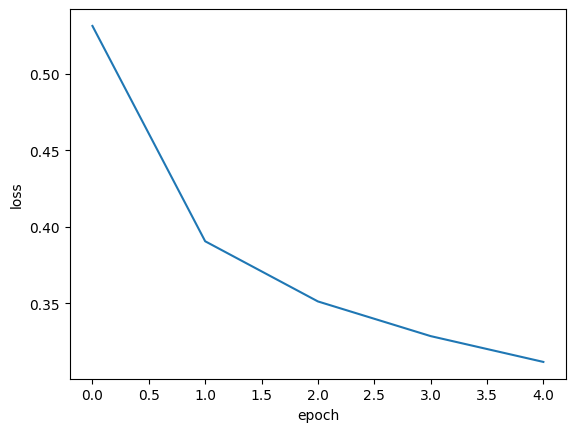

In [ ]:
# 손실 곡선
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

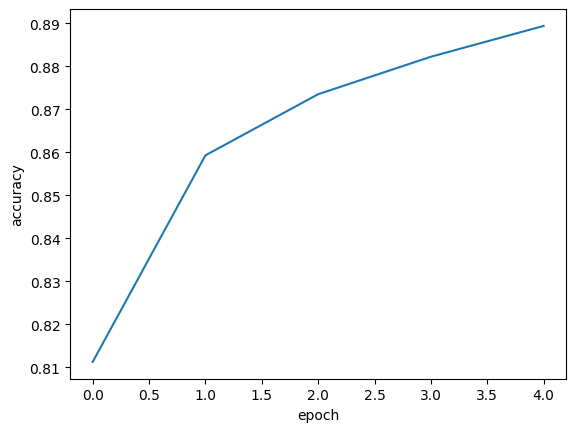

In [ ]:
# 정확도 곡선
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

### 손실곡선 - 에포크 = 20

In [ ]:
model = create_dnn_model()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 에포크를 5 => 20 으로 늘려서 모델 훈련
history = model.fit(X_train_scale_sub, y_train_sub, epochs=20, verbose=0)

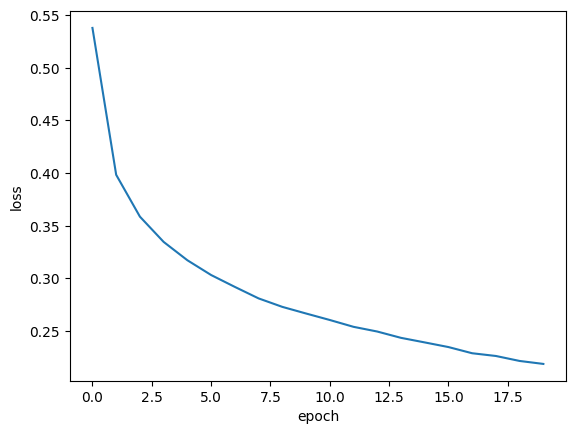

In [ ]:
# 손실 곡선
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

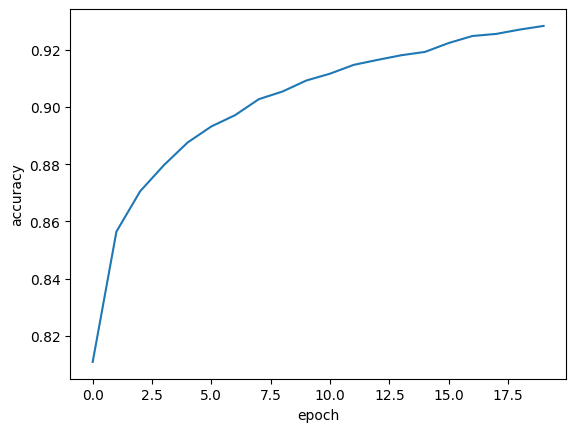

In [ ]:
# 정확도 곡선
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

## 검증 손실

### 밀집층 2개 DNN

In [ ]:
model = create_dnn_model()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# 검증 데이터 추가
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 20, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

In [ ]:
print(history)

In [ ]:
print(history.history)

{'accuracy': [0.8112708330154419, 0.8566666841506958, 0.8717291951179504, 0.879645824432373, 0.8870624899864197, 0.8936458230018616, 0.8964166641235352, 0.9005833268165588, 0.9041666388511658, 0.9080625176429749, 0.9099166393280029, 0.9122083187103271, 0.9159374833106995, 0.9179791808128357, 0.9195833206176758, 0.9232083559036255, 0.9253958463668823, 0.9262708425521851, 0.9285208582878113, 0.929437518119812], 'loss': [0.5341318249702454, 0.3940683603286743, 0.3548237383365631, 0.33201512694358826, 0.3164253830909729, 0.30356353521347046, 0.2919871509075165, 0.2829369008541107, 0.2720003128051758, 0.26514187455177307, 0.2596079409122467, 0.2537022829055786, 0.24550595879554749, 0.2418806403875351, 0.23757106065750122, 0.2310156524181366, 0.2280365526676178, 0.2230851799249649, 0.21980127692222595, 0.2166675478219986], 'val_accuracy': [0.8484166860580444, 0.8585833311080933, 0.8598333597183228, 0.8620833158493042, 0.8603333234786987, 0.8658333420753479, 0.8652499914169312, 0.860583305358

In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


### 손실곡선 - 에포크 = 20

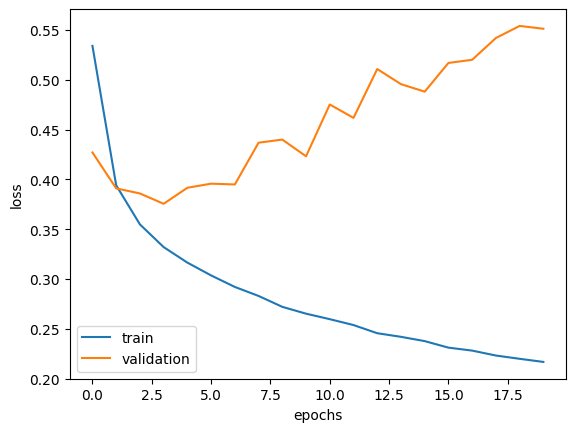

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

### 손실곡선 - 과대적합하기전 에포크

In [ ]:
# 최적의 에포크만큼 다시 훈련
model = create_dnn_model()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 5, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

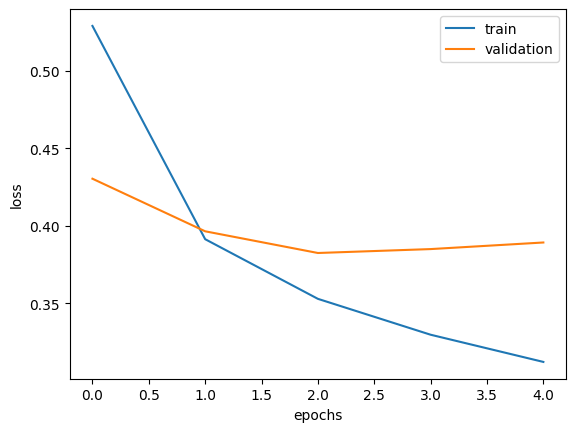

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

### 과대적합 방지 1 - 옵티마이저

#### 옵티마이저 학습률 조정

In [ ]:
# 옵티마이저 학습률 조정
model = create_dnn_model()
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 20, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

In [ ]:
print(history.history)

{'accuracy': [0.8153541684150696, 0.8576250076293945, 0.8723333477973938, 0.882854163646698, 0.890541672706604, 0.8960208296775818, 0.9003333449363708, 0.9036041498184204, 0.9078333377838135, 0.9120833277702332, 0.9151458144187927, 0.9177083373069763, 0.9218124747276306, 0.9244583249092102, 0.9273333549499512, 0.930020809173584, 0.9319375157356262, 0.934583306312561, 0.9360833168029785, 0.9371458292007446], 'loss': [0.5262244343757629, 0.3955177068710327, 0.3513415455818176, 0.3230310380458832, 0.30203133821487427, 0.2860603332519531, 0.2715012729167938, 0.26027345657348633, 0.2489769011735916, 0.23917537927627563, 0.22995682060718536, 0.2227611541748047, 0.21479882299900055, 0.20724527537822723, 0.20031896233558655, 0.19343876838684082, 0.18864810466766357, 0.18138913810253143, 0.17699477076530457, 0.17225775122642517], 'val_accuracy': [0.8399166464805603, 0.859250009059906, 0.8644166588783264, 0.8678333163261414, 0.8706666827201843, 0.8734999895095825, 0.8786666393280029, 0.880333304

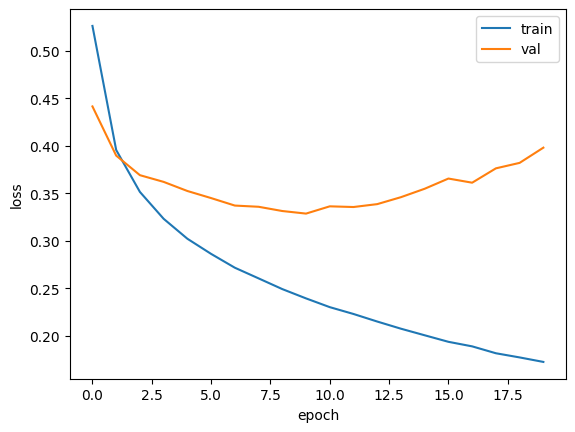

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[history_df['val_loss'] == min(history_df['val_loss'])]

,accuracy,loss,val_accuracy,val_loss
9,0.912083,0.239175,0.886083,0.328514


In [ ]:
# 최적의 에포크
model = create_dnn_model()
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 7, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


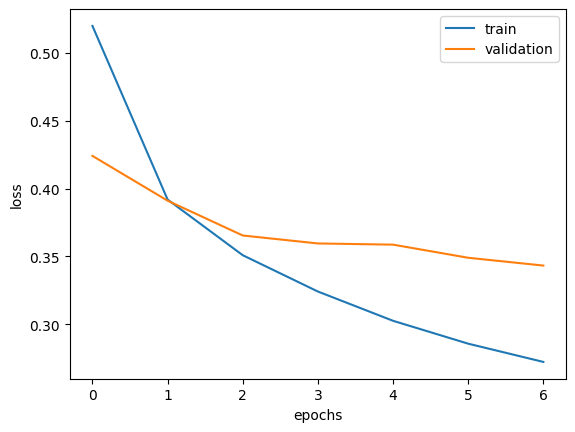

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

#### 학습률 조정

In [ ]:
# 옵티마이저 학습률 변경 => 낮춤
model = create_dnn_model()
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer= adam, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 20, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

In [ ]:
print(history.history)

{'accuracy': [0.7527708411216736, 0.8307083249092102, 0.8460624814033508, 0.854479193687439, 0.8601250052452087, 0.8649166822433472, 0.8683124780654907, 0.8713750243186951, 0.8743125200271606, 0.8769791722297668, 0.8789374828338623, 0.8812708258628845, 0.8832083344459534, 0.8850833177566528, 0.8867499828338623, 0.8883541822433472, 0.8897500038146973, 0.8907708525657654, 0.8922500014305115, 0.893750011920929], 'loss': [0.7726349234580994, 0.5090625882148743, 0.4577752351760864, 0.429251492023468, 0.4095776379108429, 0.3943691551685333, 0.38193362951278687, 0.3714779317378998, 0.36233678460121155, 0.3542318642139435, 0.346942663192749, 0.34026962518692017, 0.3341800272464752, 0.32847100496292114, 0.32318902015686035, 0.31820887327194214, 0.3135434091091156, 0.30904334783554077, 0.3048155605792999, 0.3008175492286682], 'val_accuracy': [0.8136666417121887, 0.8334166407585144, 0.8449166417121887, 0.8497499823570251, 0.8553333282470703, 0.8602499961853027, 0.8628333210945129, 0.8645833134651

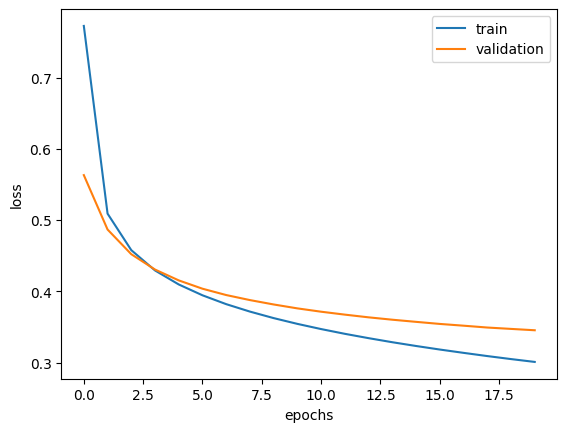

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[history_df['val_loss'] == min(history_df['val_loss'])]

,accuracy,loss,val_accuracy,val_loss
19,0.89375,0.300818,0.875167,0.345276


In [ ]:
# 옵티마이저 학습률 변경 => 더 낮춤
model = create_dnn_model()
adam = keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer= adam, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 20, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


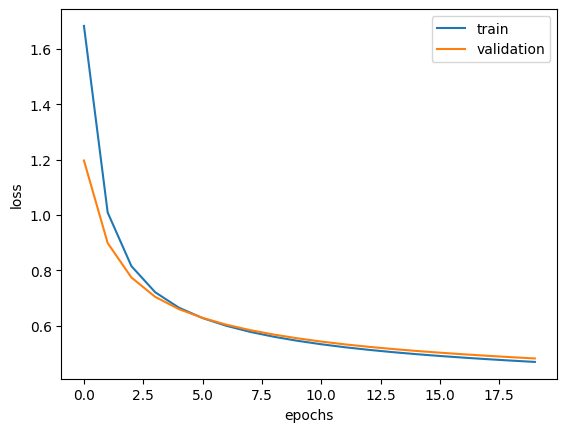

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[history_df['val_loss'] == min(history_df['val_loss'])]

,accuracy,loss,val_accuracy,val_loss
19,0.842833,0.468448,0.834083,0.480961


## 드롭아웃

### 과대적합 방지 2 - 드롭아웃

In [ ]:
# 모델 만들기
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 함수로 모델 만들기
def create_dnn_model(add_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if add_layer:
      model.add(add_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [ ]:
model = create_dnn_model(keras.layers.Dropout(0.3))

In [ ]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 드롭아웃 심층신경망
model = create_dnn_model(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 20, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
print(history.history)

{'accuracy': [0.7943124771118164, 0.8426666855812073, 0.8538333177566528, 0.8613749742507935, 0.8662499785423279, 0.8684791922569275, 0.8745208382606506, 0.8768125176429749, 0.8802499771118164, 0.8816249966621399, 0.883062481880188, 0.8866875171661377, 0.8882499933242798, 0.8897916674613953, 0.8915625214576721, 0.8943125009536743, 0.8945833444595337, 0.8942916393280029, 0.8959166407585144, 0.8979791402816772], 'loss': [0.5904645919799805, 0.4371204078197479, 0.40391987562179565, 0.37965095043182373, 0.3654472529888153, 0.356484055519104, 0.34324368834495544, 0.3351684510707855, 0.325209379196167, 0.3179488182067871, 0.31404247879981995, 0.30788859724998474, 0.3023988902568817, 0.2977142632007599, 0.2899990379810333, 0.2877066433429718, 0.28133267164230347, 0.28129416704177856, 0.2779591381549835, 0.27220022678375244], 'val_accuracy': [0.8464999794960022, 0.856166660785675, 0.8660833239555359, 0.8684166669845581, 0.8754166960716248, 0.8761666417121887, 0.874666690826416, 0.8790000081062

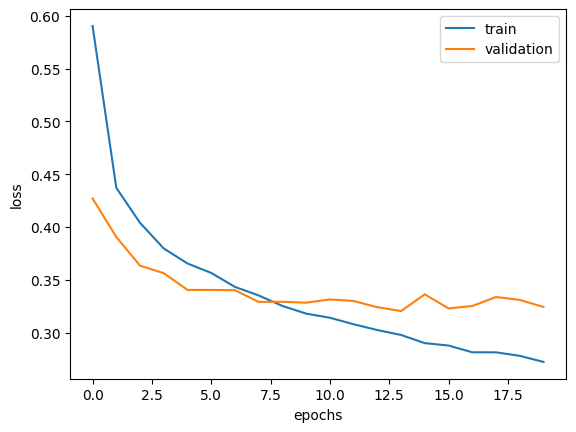

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

## 모델 저장과 복원

In [ ]:
# 드롭아웃 심층신경망
model = create_dnn_model(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 10, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.save_weights('./model_only.weights.h5')

In [ ]:
model.save('./model_all.h5')

#### 파라미터와 모델이 모두 저장된 파일

In [ ]:
model = keras.models.load_model('model_all.h5')

In [ ]:
model.evaluate(X_train_scale_val, y_train_val)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8874 - loss: 0.3236


[0.3278958797454834, 0.8837500214576721]

#### 파라미터만 저장된 파일

In [ ]:
# 모델 구조를 먼저 만들어야 함
model = create_dnn_model(keras.layers.Dropout(0.3))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.load_weights('model_only.weights.h5')

In [ ]:
model.evaluate(X_train_scale_val, y_train_val)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8874 - loss: 0.3236


[0.3278958797454834, 0.8837500214576721]

#### 확률값 계산

In [ ]:
model.predict(X_train_scale_val)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[8.8957296e-12, 1.9763130e-14, 5.5194824e-12, ..., 4.9671156e-10,
        9.9994665e-01, 3.7361243e-11],
       [1.8475397e-08, 1.6046646e-16, 9.6723030e-10, ..., 3.1258267e-13,
        9.9999970e-01, 3.2845139e-14],
       [6.6568574e-12, 3.3453521e-11, 1.2475787e-13, ..., 9.9974144e-01,
        3.6603836e-08, 7.7418190e-07],
       ...,
       [1.2418440e-06, 6.2143243e-14, 9.2373442e-09, ..., 2.1233808e-08,
        9.9998659e-01, 1.6000712e-09],
       [1.6777431e-09, 9.3800521e-17, 1.1242393e-09, ..., 6.2286710e-14,
        9.9999994e-01, 6.6433556e-12],
       [4.2908993e-01, 1.7821167e-04, 9.5861182e-03, ..., 2.5024502e-02,
        4.6181296e-05, 4.3916877e-02]], dtype=float32)

In [ ]:
model.predict(X_train_scale_val)[0]

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([8.8957296e-12, 1.9763130e-14, 5.5194824e-12, 7.2015462e-13,
       6.2797725e-11, 5.3229924e-05, 1.0380101e-12, 4.9671156e-10,
       9.9994665e-01, 3.7361243e-11], dtype=float32)

In [ ]:
y_train_val_pred = np.argmax(model.predict(X_train_scale_val), axis = 1)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
y_train_val_pred

array([8, 8, 7, ..., 8, 8, 6])

In [ ]:
# Label	Description
# 0	T-shirt/top
# 1	Trouser
# 2	Pullover
# 3	Dress
# 4	Coat
# 5	Sandal
# 6	Shirt
# 7	Sneaker
# 8	Bag
# 9	Ankle boot

In [ ]:
# 정확도
np.mean(y_train_val == y_train_val_pred)

0.88375

### 체크포인트 콜백

In [ ]:
# 드롭아웃 심층신경망
model = create_dnn_model(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# 체크포인트 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath='./best_model.keras', save_best_only=True)
# 훈련
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 20, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val),
                    callbacks = [checkpoint_cb])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.evaluate(X_train_scale_val, y_train_val)
# 20 에포크까지 훈련된 모델로 평가한 결과

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8895 - loss: 0.3127


[0.3166320025920868, 0.8869166374206543]

In [ ]:
# 최적의 모델로 평가해야 함
model = keras.models.load_model('best_model.keras')

In [ ]:
model.evaluate(X_train_scale_val, y_train_val)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8895 - loss: 0.3127


[0.3166320025920868, 0.8869166374206543]

#### 검증 손실 - 히스토리 확인(별도)

In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [ ]:
print(history.history)

{'accuracy': [0.7946458458900452, 0.8422291874885559, 0.8549374938011169, 0.8619791865348816, 0.8657083511352539, 0.8716458082199097, 0.8756666779518127, 0.8789583444595337, 0.8812708258628845, 0.8818541765213013, 0.8862291574478149, 0.8868541717529297, 0.8887500166893005, 0.890250027179718, 0.8919374942779541, 0.8932708501815796, 0.8935624957084656, 0.8939791917800903, 0.8956875205039978, 0.8972291946411133], 'loss': [0.5893930792808533, 0.4391462504863739, 0.3983977437019348, 0.37971651554107666, 0.36722326278686523, 0.34912335872650146, 0.33952897787094116, 0.3308464288711548, 0.32252761721611023, 0.3179132342338562, 0.30896952748298645, 0.3049805164337158, 0.29953762888908386, 0.2950224280357361, 0.2882991433143616, 0.2838762402534485, 0.28486013412475586, 0.2782137393951416, 0.2760217487812042, 0.2712538242340088], 'val_accuracy': [0.8430833220481873, 0.8599166870117188, 0.8685833215713501, 0.8695833086967468, 0.8767499923706055, 0.8755833506584167, 0.8803333044052124, 0.877749979

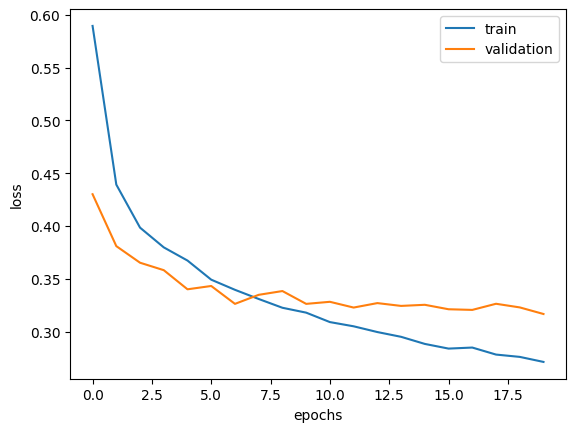

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[history_df['val_loss'] == min(history_df['val_loss'])]

,accuracy,loss,val_accuracy,val_loss
19,0.897229,0.271254,0.886917,0.316632


### 조기종료 콜백

In [ ]:
# 드롭아웃 심층신경망
model = create_dnn_model(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# 체크포인트 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_model.keras', save_best_only=True)
# 조기종료 콜백
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
# 훈련
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 20, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val),
                    callbacks = [checkpoint_cb, early_stopping_cb])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
print(early_stopping_cb.stopped_epoch)

6


In [ ]:
model.evaluate(X_train_scale_val, y_train_val)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8732 - loss: 0.3453


[0.34913817048072815, 0.8710833191871643]

#### 검증 손실 - 히스토리 확인(별도)

In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [ ]:
print(history.history)

{'accuracy': [0.7909166812896729, 0.8419166803359985, 0.8513333201408386, 0.8619999885559082, 0.8645625114440918, 0.8696249723434448, 0.8731250166893005], 'loss': [0.6013396978378296, 0.44122233986854553, 0.4072835147380829, 0.3826358914375305, 0.36725345253944397, 0.3552233576774597, 0.34306690096855164], 'val_accuracy': [0.840666651725769, 0.8605833053588867, 0.8673333525657654, 0.871916651725769, 0.8710833191871643, 0.8742499947547913, 0.8740000128746033], 'val_loss': [0.428602010011673, 0.3845193386077881, 0.37077584862709045, 0.35202357172966003, 0.34913817048072815, 0.3499287962913513, 0.34948307275772095]}


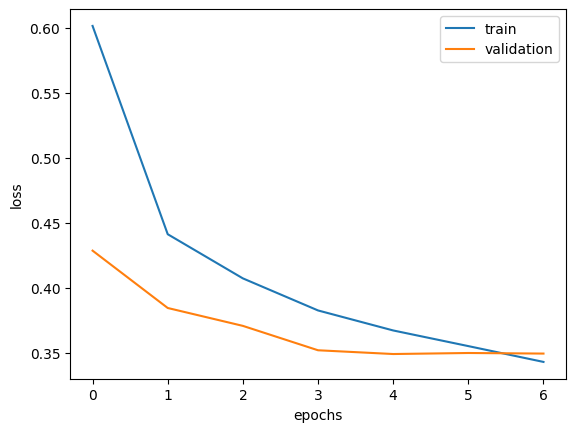

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[history_df['val_loss'] == min(history_df['val_loss'])]

,accuracy,loss,val_accuracy,val_loss
4,0.864563,0.367253,0.871083,0.349138


### 최종 평가

In [ ]:
# 최적의 에포크
patience = 2
opt_epoch = early_stopping_cb.stopped_epoch - patience + 1

In [ ]:
# 조기종료된 모델이 곧 최적의 에포크 모델이지만 훈련 전체 데이터로 다시 훈련하였으므로 다른 결과 볼 수 있음
model = create_dnn_model(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# 훈련 전체 데이터로 훈련 후 평가 예정
history = model.fit(X_train_scale, y_train, epochs = opt_epoch, verbose = 0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# 표준화
X_test_scale = X_test / 255.0

In [ ]:
# 최종 평가
model.evaluate(X_test_scale, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8713 - loss: 0.3535


[0.35915058851242065, 0.8701000213623047]

# 신경망 모델 훈련 - iris

## 손실 곡선

### 데이터 준비

In [ ]:
# 데이터 불러오기
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# 데이터 자료형 확인
print(df.info())
# 데이터 통계 요약정보 확인
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.50000

In [ ]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
# 클래스 빈도
df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


### 시각화

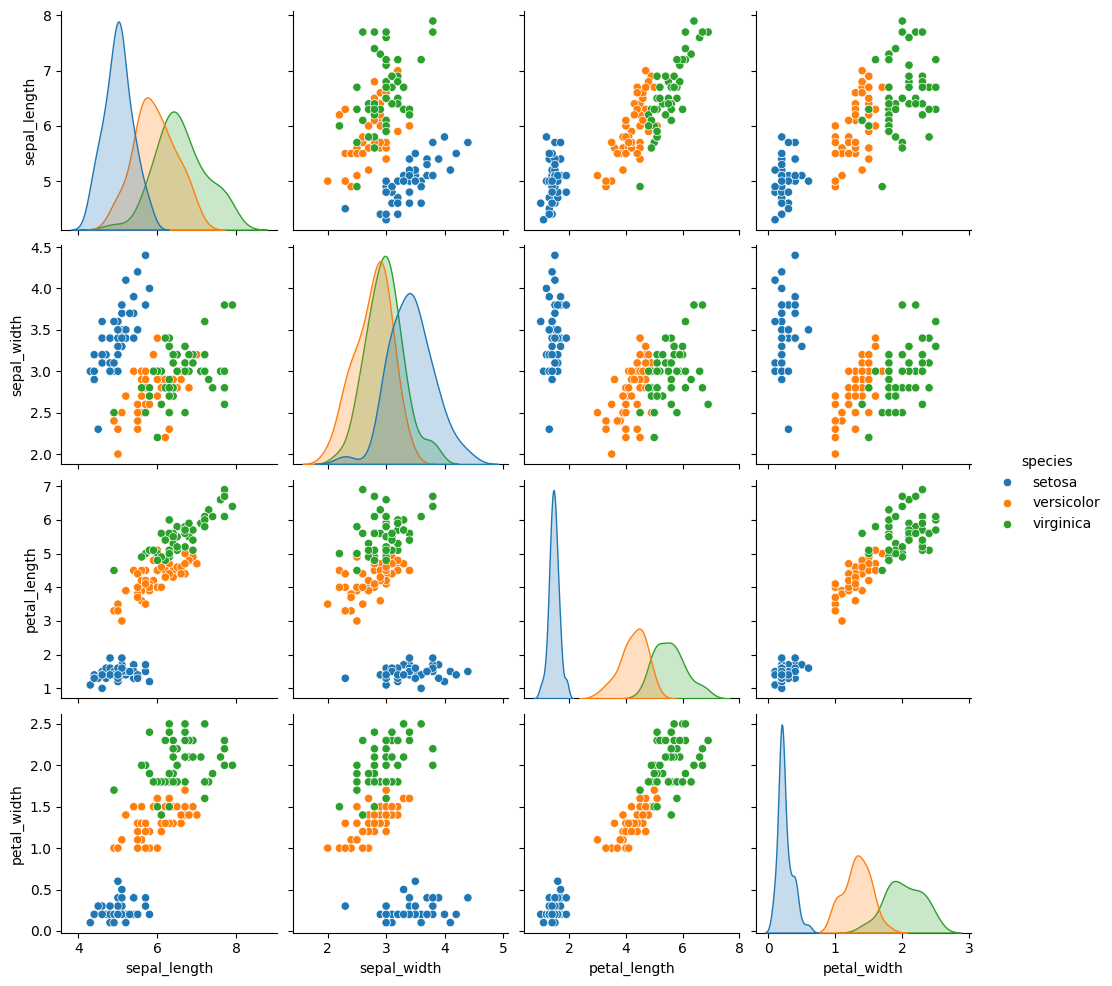

In [ ]:
sns.pairplot(data = df, hue = 'species')
plt.show()

### 속성 선택

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
# 속성(변수) 선택
X = df.drop(['species'], axis = 1).values
y = df['species'].values

print('input data 개수: ', X.shape)
print('target data 개수: ', y.shape)

input data 개수:  (150, 4)
target data 개수:  (150,)


In [ ]:
print(y)
from sklearn import preprocessing
# 전처리 엔코더 객체
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)
print(y)

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'v

### 데이터 분할

In [ ]:
# 훈련/테스트 데이터 분할
from sklearn.model_selection import train_test_split
# train data 와 test data로 구분
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (120, 4)
test data 개수:  (30, 4)


In [ ]:
# 훈련 테이터의 입력, 타깃 데이터의 크기 확인
print(X_train.shape, y_train.shape)

(120, 4) (120,)


In [ ]:
# 테스트 테이터의 입력, 타깃 데이터의 크기 확인
print(X_test.shape, y_test.shape)

(30, 4) (30,)


In [ ]:
print(X_train[1])
print(X_train[1].shape)

[5.7 4.4 1.5 0.4]
(4,)


In [ ]:
print(y_train)

[0 0 1 0 0 2 1 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1
 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1
 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1
 1 2 2 0 1 2 0 1 2]


### 표준화

In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(X_train)
X_train_scale = standard.transform(X_train)
X_test_scale = standard.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
# 훈련, 검증 데이터 분할 8:2
X_train_scale_sub, X_train_scale_val, y_train_sub, y_train_val = train_test_split(X_train_scale,
                                                                                  y_train,
                                                                                  test_size = 0.2,
                                                                                  random_state=42)
# 전체 훈련 데이터 크기 확인
print(X_train.shape)
# 훈련 데이터 크기 확인
print(X_train_scale_sub.shape)
# 검증 데이터 크기 확인
print(X_train_scale_val.shape)

(120, 4)
(96, 4)
(24, 4)


## 심층 신경망 만들기

In [ ]:
# 모델 생성을 함수로 만들기
def create_dnn_model():
  model = keras.Sequential()
  model.add(keras.layers.Dense(100, activation = 'relu', input_shape = (4, )))
  model.add(keras.layers.Dense(3, activation = 'softmax'))
  return model

In [ ]:
model = create_dnn_model()

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                     │ (None, 100)                 │             500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 803 (3.14 KB)

 Trainable params: 803 (3.14 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

### 히스토리

In [ ]:
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 10, verbose = 0)

In [ ]:
print(history)

In [ ]:
print(history.history)

{'accuracy': [0.15625, 0.3333333432674408, 0.4895833432674408, 0.5416666865348816, 0.59375, 0.6458333134651184, 0.71875, 0.75, 0.7604166865348816, 0.78125], 'loss': [1.3250352144241333, 1.1529383659362793, 1.0489858388900757, 0.9687840342521667, 0.9023857116699219, 0.8452113270759583, 0.7947823405265808, 0.7500366568565369, 0.7101295590400696, 0.6743146777153015]}


In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


In [ ]:
history_df = pd.DataFrame(history.history)
history_df

,accuracy,loss
0,0.156250,1.325035
1,0.333333,1.152938
2,0.489583,1.048986
3,0.541667,0.968784
4,0.593750,0.902386
5,0.645833,0.845211
6,0.718750,0.794782
7,0.750000,0.750037
8,0.760417,0.710130
9,0.781250,0.674315


### 손실곡선 - 에포크 = 10

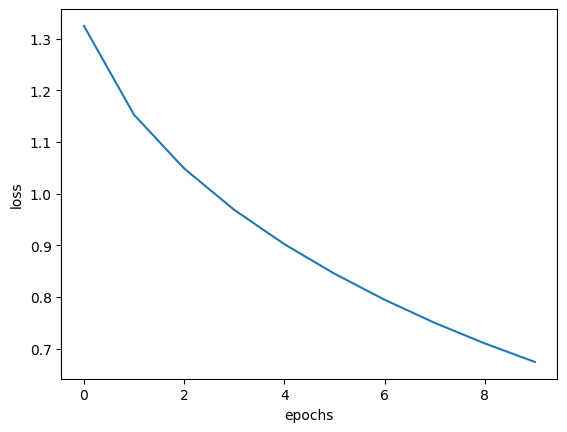

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

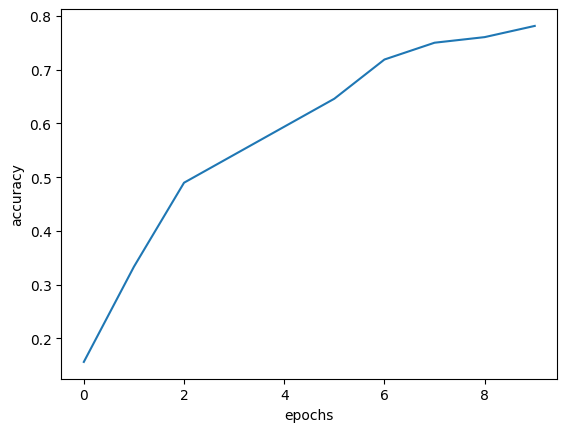

In [ ]:
# 손실곡선 - 정확도
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

### 손실곡선 - 에포크 = 100

In [ ]:
model = create_dnn_model()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 100, verbose = 0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


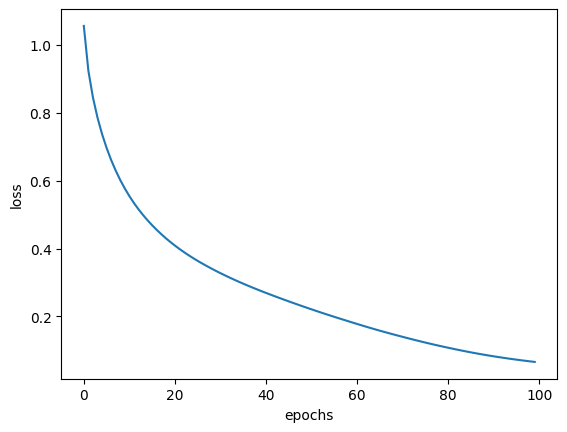

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

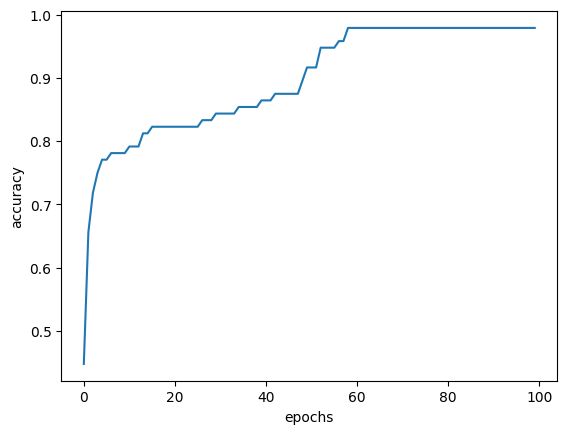

In [ ]:
# 손실곡선 - 정확도
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

## 검증 손실

### 밀집층 2개 DNN

In [ ]:
# 모델
model = create_dnn_model()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 500, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [ ]:
print(history.history)

{'accuracy': [0.3645833432674408, 0.46875, 0.59375, 0.7291666865348816, 0.78125, 0.78125, 0.8125, 0.8020833134651184, 0.8125, 0.8020833134651184, 0.8020833134651184, 0.8020833134651184, 0.8020833134651184, 0.8020833134651184, 0.8020833134651184, 0.7916666865348816, 0.8125, 0.8125, 0.8125, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.84375, 0.84375, 0.84375, 0.84375, 0.8541666865348816, 0.8645833134651184, 0.8645833134651184, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.8854166865348816, 0.90625, 0.9270833134651184, 0.9270833134651184, 0.9375, 0.9375, 0.9375, 0.9479166865348816, 0.9583333134651184, 0.9583333134651184, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.9791666865348816, 0.9791666865348816, 0.9791666865348816, 0.9791666865348816, 0.9791666865348816, 0

### 손실곡선 - 에포크 = 500

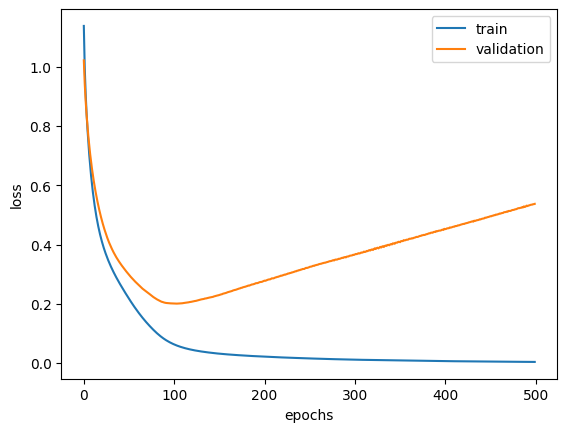

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[history_df['val_loss'] == min(history_df['val_loss'])]

,accuracy,loss,val_accuracy,val_loss
103,0.979167,0.059069,0.875,0.200669


### 손실곡선 - 과대적합하기전 에포크

In [ ]:
# 최적의 에포크로 다시 훈련
model = create_dnn_model()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 104, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


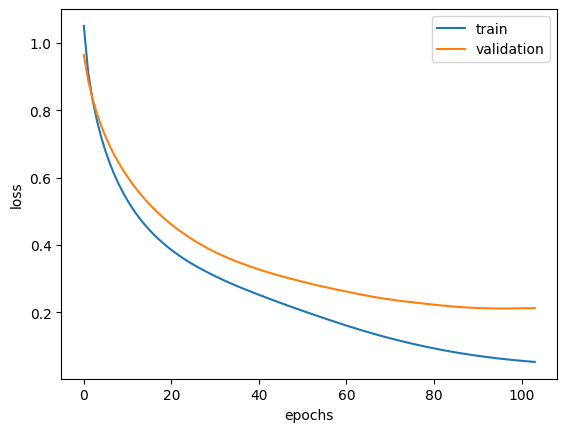

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

### 과대적합 방지 1 - 옵티마이저

#### 옵티마이저 학습률 조정

In [ ]:
# 옵티마이저 학습률 조정
model = create_dnn_model()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 500, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

In [ ]:
print(history.history)

{'accuracy': [0.5520833134651184, 0.65625, 0.75, 0.8020833134651184, 0.8125, 0.8125, 0.8125, 0.8229166865348816, 0.8229166865348816, 0.8125, 0.8125, 0.8125, 0.8125, 0.8125, 0.8125, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8333333134651184, 0.84375, 0.84375, 0.84375, 0.84375, 0.8541666865348816, 0.8541666865348816, 0.8541666865348816, 0.8541666865348816, 0.8541666865348816, 0.8541666865348816, 0.8645833134651184, 0.8645833134651184, 0.8645833134651184, 0.8645833134651184, 0.8645833134651184, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.8958333134651184, 0.9166666865348816, 0.9166666865348816, 0.9375, 0.9479166865348816, 0.9479166865348816, 0.9479166865348816, 0.9479166865348816, 0.9479166865348816, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.9

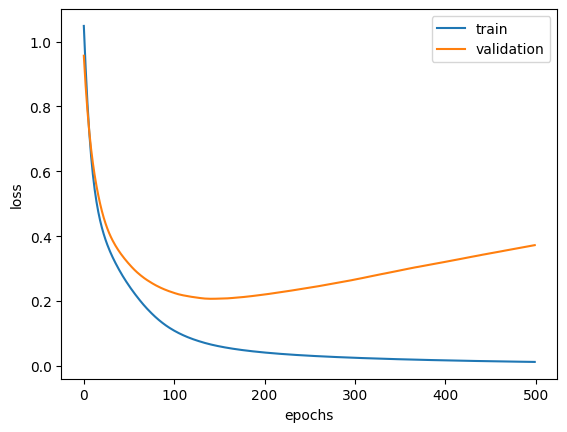

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[history_df['val_loss'] == min(history_df['val_loss'])]

,accuracy,loss,val_accuracy,val_loss
141,0.979167,0.065465,0.875,0.206724


In [ ]:
# 최적의 에포크로 다시 훈련
model = create_dnn_model()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 142, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


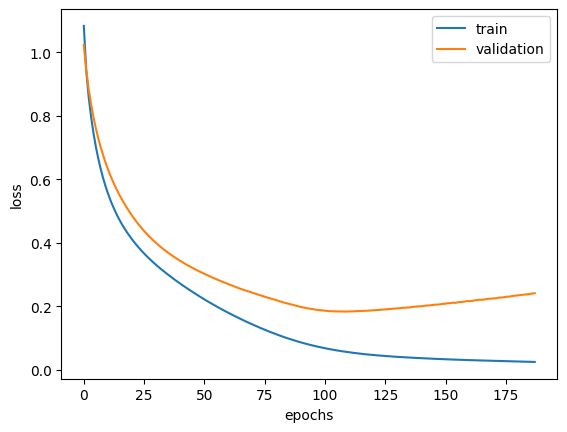

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

#### 학습률 조정

In [ ]:
# 옵티마이저 학습률 조정 => 학습률 낮춤
model = create_dnn_model()
adam = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 500, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

In [ ]:
print(history.history)

{'accuracy': [0.6458333134651184, 0.65625, 0.6875, 0.6979166865348816, 0.6875, 0.6875, 0.6770833134651184, 0.6875, 0.71875, 0.7291666865348816, 0.75, 0.7604166865348816, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.7708333134651184, 0.78125, 0.7916666865348816, 0.7916666865348816, 0.7916666865348816, 0.8020833134651184, 0.8020833134651184, 0.8020833134651184, 0.8020833134651184, 0.8020833134651184, 0.8020833134651184, 0.8020833134651184, 0.8020833134651184, 0.8125, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0

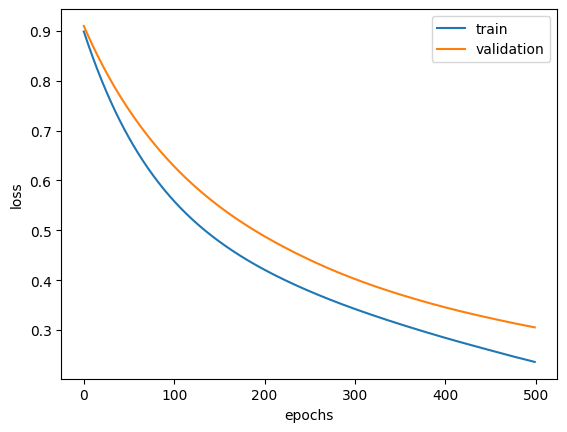

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[history_df['val_loss'] == min(history_df['val_loss'])]

,accuracy,loss,val_accuracy,val_loss
499,0.9375,0.236239,0.916667,0.305527


## 드롭아웃

### 과대적합 방지 2 - 드롭아웃

In [ ]:
# 드롭아웃 모델 만들기
def create_dnn_model(add_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Dense(100, activation = 'relu', input_shape = (4, )))
  if add_layer:
    model.add(add_layer)
  model.add(keras.layers.Dense(3, activation = 'softmax'))
  return model

In [ ]:
model = create_dnn_model(keras.layers.Dropout(0.3))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_58 (Dense)                     │ (None, 100)                 │             500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 3)                   │             303 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 803 (3.14 KB)

 Trainable params: 803 (3.14 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 드롭아웃만
model = create_dnn_model(keras.layers.Dropout(0.3))
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 500, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

In [ ]:
print(history.history)

{'accuracy': [0.28125, 0.5625, 0.6979166865348816, 0.6770833134651184, 0.7395833134651184, 0.78125, 0.8125, 0.7708333134651184, 0.8125, 0.8020833134651184, 0.78125, 0.8333333134651184, 0.8125, 0.8333333134651184, 0.7916666865348816, 0.8333333134651184, 0.8020833134651184, 0.8020833134651184, 0.8229166865348816, 0.8020833134651184, 0.8229166865348816, 0.8020833134651184, 0.8020833134651184, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8333333134651184, 0.8125, 0.8229166865348816, 0.8229166865348816, 0.8333333134651184, 0.8229166865348816, 0.8229166865348816, 0.84375, 0.8541666865348816, 0.8541666865348816, 0.84375, 0.84375, 0.8541666865348816, 0.8541666865348816, 0.875, 0.8645833134651184, 0.84375, 0.8645833134651184, 0.8645833134651184, 0.8854166865348816, 0.8854166865348816, 0.875, 0.8854166865348816, 0.875, 0.90625, 0.875, 0.90625, 0.875, 0.8958333134651184, 0.9166666865348816, 0.8958333134651184, 0.9270833134651184, 0.8958333134651184, 0.8854166865348816, 0.9375, 0.

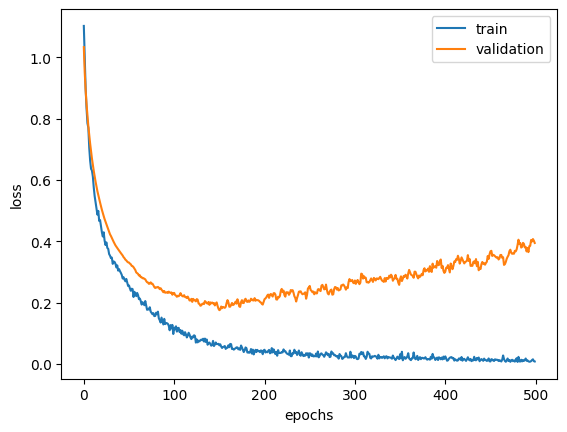

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[history_df['val_loss'] == min(history_df['val_loss'])]

,accuracy,loss,val_accuracy,val_loss
150,0.979167,0.060411,0.916667,0.175122


In [ ]:
# 최적의 에포크로 다시 훈련
model = create_dnn_model(keras.layers.Dropout(0.3))
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 151, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


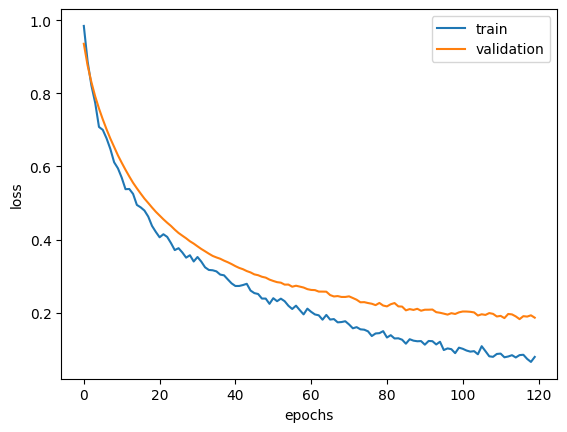

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# 드롭아웃 + 아담
model = create_dnn_model(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 500, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

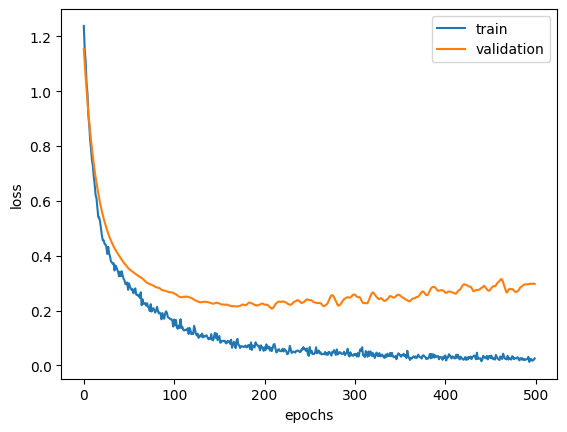

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[history_df['val_loss'] == min(history_df['val_loss'])]

,accuracy,loss,val_accuracy,val_loss
208,0.989583,0.05215,0.875,0.207029


In [ ]:
# 최적의 에포크로 다시 훈련
model = create_dnn_model(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 209, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

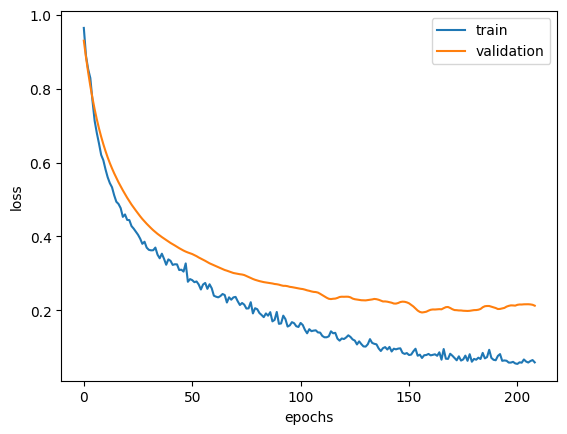

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
model.evaluate(X_train_scale_val, y_train_val)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9167 - loss: 0.2126


[0.21256321668624878, 0.9166666865348816]

## 모델 저장과 복원

In [ ]:
model = create_dnn_model(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 200, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val))

In [ ]:
model.save_weights('model_onlyparams.weights.h5')

In [ ]:
model.save('model_all.keras')

#### 파라미터와 모델이 모두 저장된 파일

In [ ]:
# 파라미터 + 모델 구조 저장 파일
model = keras.models.load_model('model_all.keras')
model.evaluate(X_train_scale_val, y_train_val)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.9167 - loss: 0.2009


[0.20088379085063934, 0.9166666865348816]

#### 파라미터만 저장된 파일

In [ ]:
# 파라미터만 저장 파일
model = create_dnn_model(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.load_weights('model_onlyparams.weights.h5')
model.evaluate(X_train_scale_val, y_train_val)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.9167 - loss: 0.2009


[0.20088379085063934, 0.9166666865348816]

## 확률값 계산

In [ ]:
model.predict(X_train_scale_val)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[4.26008191e-04, 9.85677421e-01, 1.38964355e-02],
       [1.58813072e-03, 8.68519723e-01, 1.29892170e-01],
       [9.99339521e-01, 6.58327306e-04, 2.18194214e-06],
       [9.93137956e-01, 6.85179187e-03, 1.03120647e-05],
       [9.97995436e-01, 2.00080941e-03, 3.64022799e-06],
       [2.63989818e-06, 1.05897721e-03, 9.98938382e-01],
       [4.75411973e-04, 2.77901024e-01, 7.21623480e-01],
       [1.99491289e-04, 1.45656997e-02, 9.85234797e-01],
       [3.89055822e-05, 4.47741197e-03, 9.95483518e-01],
       [2.62620655e-04, 2.37845667e-02, 9.75952864e-01],
       [4.51486884e-03, 9.65115428e-01, 3.03697176e-02],
       [8.51653807e-04, 1.30000576e-01, 8.69147658e-01],
       [1.07068643e-01, 7.99156010e-01, 9.37753692e-02],
       [3.29777263e-02, 9.46691155e-01, 2.03310363e-02],
       [1.74776427e-02, 9.09562469e-01, 7.29599223e-02],
       [6.27380073e-01, 3.72481912e-01, 1.37935509e-04],
       [5.50579280e-04, 5.03175221e-02, 9.49131846e-01],
       [9.99933064e-01, 6.64691

In [ ]:
model.predict(X_train_scale_val)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([4.26008191e-04, 9.85677421e-01, 1.38964355e-02], dtype=float32)

In [ ]:
y_train_val_pred = np.argmax(model.predict(X_train_scale_val), axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [ ]:
y_train_val_pred

array([1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 0, 2, 0, 1, 0, 1, 1,
       0, 0])

In [ ]:
np.mean(y_train_val == y_train_val_pred)

0.9166666666666666

## 콜백

### 체크포인트 콜백

In [ ]:
# 체크포인트
model = create_dnn_model(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_model.keras',
                                                save_best_only = True)
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 200, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val),
                    callbacks = [checkpoint_cb])

In [ ]:
model = keras.models.load_model('best_model.keras')
model.evaluate(X_train_scale_val, y_train_val)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.8750 - loss: 0.1894


[0.1894247680902481, 0.875]

#### 검증 손실 - 히스토리 확인(별도)

In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [ ]:
print(history.history)

{'accuracy': [0.46875, 0.5729166865348816, 0.6875, 0.71875, 0.7291666865348816, 0.7708333134651184, 0.78125, 0.8333333134651184, 0.7708333134651184, 0.8020833134651184, 0.78125, 0.8229166865348816, 0.7604166865348816, 0.7916666865348816, 0.7916666865348816, 0.8125, 0.8125, 0.8125, 0.7916666865348816, 0.8125, 0.78125, 0.8229166865348816, 0.8229166865348816, 0.8229166865348816, 0.8333333134651184, 0.8125, 0.8125, 0.8229166865348816, 0.8333333134651184, 0.8333333134651184, 0.84375, 0.8333333134651184, 0.84375, 0.84375, 0.8125, 0.84375, 0.8541666865348816, 0.8541666865348816, 0.84375, 0.8541666865348816, 0.8541666865348816, 0.84375, 0.84375, 0.875, 0.84375, 0.8333333134651184, 0.8645833134651184, 0.875, 0.8645833134651184, 0.8645833134651184, 0.9270833134651184, 0.8958333134651184, 0.8958333134651184, 0.875, 0.90625, 0.8958333134651184, 0.8958333134651184, 0.8958333134651184, 0.8958333134651184, 0.8958333134651184, 0.9166666865348816, 0.90625, 0.8854166865348816, 0.9166666865348816, 0.9166

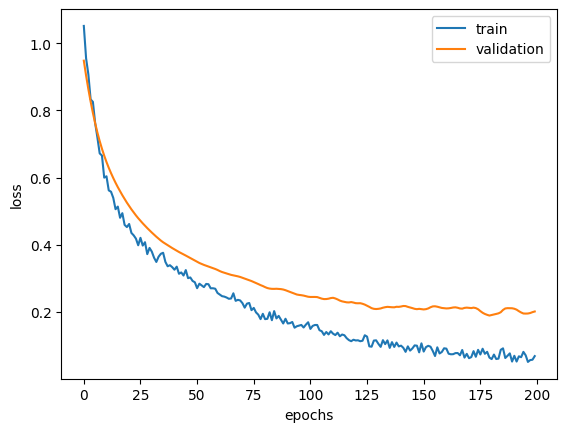

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[history_df['val_loss'] == min(history_df['val_loss'])]

,accuracy,loss,val_accuracy,val_loss
179,0.979167,0.06434,0.875,0.189425


### 조기종료 콜백

In [ ]:
# 체크포인트 + 조기종료
model = create_dnn_model(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_model.keras',
                                                save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2,
                                                  restore_best_weights = True)
history = model.fit(X_train_scale_sub, y_train_sub, epochs = 200, verbose = 0,
                    validation_data = (X_train_scale_val, y_train_val),
                    callbacks = [checkpoint_cb, early_stopping_cb])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
print(early_stopping_cb.stopped_epoch)

109


In [ ]:
# 조기 종료로 얻은 모델을 사용해 검증 세트에 대한 성능 확인
model.evaluate(X_train_scale_val, y_train_val)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8750 - loss: 0.2200


[0.22002215683460236, 0.875]

#### 검증 손실 - 히스토리 확인(별도)

In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [ ]:
print(history.history)

{'accuracy': [0.4791666567325592, 0.625, 0.7395833134651184, 0.75, 0.7291666865348816, 0.8125, 0.8125, 0.8125, 0.78125, 0.8125, 0.8125, 0.8020833134651184, 0.8125, 0.7916666865348816, 0.7916666865348816, 0.8125, 0.8125, 0.8229166865348816, 0.8020833134651184, 0.8125, 0.8125, 0.8333333134651184, 0.8125, 0.8333333134651184, 0.8125, 0.8125, 0.8125, 0.8541666865348816, 0.8229166865348816, 0.8125, 0.8229166865348816, 0.8333333134651184, 0.84375, 0.8229166865348816, 0.8333333134651184, 0.8229166865348816, 0.8229166865348816, 0.8333333134651184, 0.8333333134651184, 0.875, 0.84375, 0.8541666865348816, 0.8541666865348816, 0.875, 0.8541666865348816, 0.8854166865348816, 0.8541666865348816, 0.84375, 0.84375, 0.8645833134651184, 0.875, 0.8541666865348816, 0.8854166865348816, 0.8854166865348816, 0.8958333134651184, 0.9166666865348816, 0.875, 0.90625, 0.9270833134651184, 0.8958333134651184, 0.9166666865348816, 0.9166666865348816, 0.9166666865348816, 0.8958333134651184, 0.9375, 0.90625, 0.9375, 0.9375

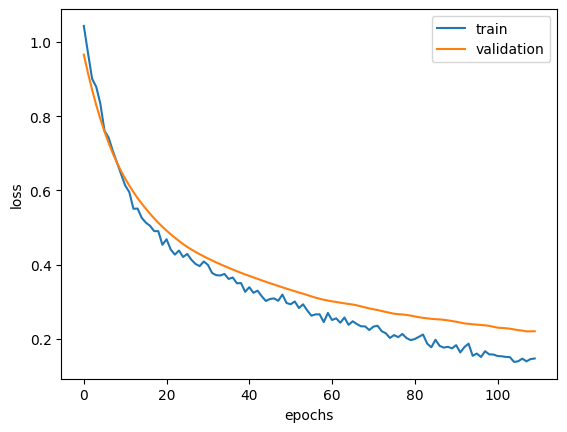

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
history_df = pd.DataFrame(history.history)
history_df[history_df['val_loss'] == min(history_df['val_loss'])]

,accuracy,loss,val_accuracy,val_loss
107,0.958333,0.139214,0.875,0.220022


### 최종 평가

In [ ]:
# 최적의 에포크
patience = 2
opt_epoch = early_stopping_cb.stopped_epoch - patience + 1

In [ ]:
# 드롭아웃 심층신경망
model = create_dnn_model(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# 훈련
history = model.fit(X_train_scale, y_train, epochs = opt_epoch, verbose = 0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.evaluate(X_test_scale, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 1.0000 - loss: 0.0824


[0.08237063139677048, 1.0]

## IMDB 리뷰 데이터셋

###  IMDB 데이터 불러오기

In [ ]:
from tensorflow.keras.datasets import imdb
# 실제 IMDB 리뷰 데이터셋은 영어로 된 문장이지만 편리하게도 텐서플로에는 이미 정수로 바꾼 데이터
# num_words=300 : 자주 등장하는 단어 300개만 사용
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=300)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
# 훈련 / 테스트 데이터 크기
print(X_train.shape, X_test.shape)

(25000,) (25000,)


In [ ]:
# 1차원 배열 형태 - 리뷰 텍스트 길이는 제각각이므로 고정크기 2차원 배열로 담기보다 리뷰마다 별도의 리스트로 담아야 메모리 효율적
# 첫 번째 리뷰
print(X_train[0])
# 첫 번째 리뷰의 길이
print(len(X_train[0]))
# 2 번째 리뷰의 길이
print(len(X_train[1]))
# 어휘 사전에는 300 개의 단어만 들어가 있으므로 어휘 사전에 없는 단어는 모두 2로 표시됨

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 284, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
218
189


In [ ]:
# 타깃 데이터 20개 출력
print(y_train[:20])
# 0 부정, 1 긍정

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


### 훈련 세트 준비

In [ ]:
# 검증 데이터 분할
from sklearn.model_selection import train_test_split
X_train_sub, X_train_val, y_train_sub, y_train_val = train_test_split(X_train,
                                                                      y_train,
                                                                      test_size = 0.2,
                                                                      random_state=42)
print(X_train.shape)
print(X_train_sub.shape)
print(X_train_val.shape)

(25000,)
(20000,)
(5000,)


In [ ]:
# 훈련서브 데이터의 각 리뷰의 길이
length = np.array([len(x) for x in X_train_sub])
length

array([259, 520, 290, ..., 300,  70,  77])

In [ ]:
# 리뷰 길이의 평균, 중앙값
print(np.mean(length))
print(np.median(length))

239.00925
178.0


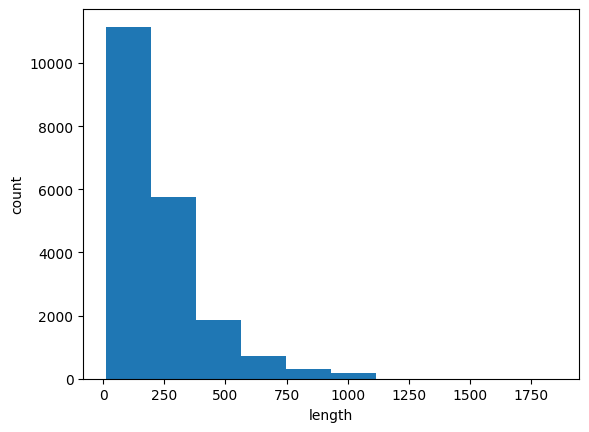

In [ ]:
# 왼쪽으로 비대칭
# 머리 왼쪽 꼬리 오른쪽 긴 분포 = 왜도 > 0
plt.hist(length)
plt.xlabel('length')
plt.ylabel('count')
plt.show()
# 대부분의 리뷰 길이가 300 이하
# 평균이 중앙값보다 큰 이유는 우측에 아주 큰 데이터가 있음 = 천개 단어가 넘는 리뷰
# 리뷰는 대부분 짧아서 중앙값보다 작은 100개 단어만 사용
# 하지만 여전히 100개보다 작은 리뷰가 있어 길이 100을 맞추기 위해 패딩이 필요

### 시퀀스 패딩

In [ ]:
# 시퀀스 패딩
# 시퀀스 = 100 (maxlen=100) - 100보다 길면 잘라내고, 짧으면 0 으로 패딩
# 기본적으로 maxlen 보다 긴 시퀀스의 앞부분을 자름
# 일반적으로 시퀀스의 뒷부분의 정보가 더 유용
# 영화 리뷰는 끝 부분에 뭔가 결정적인 소감을 말할 가능성이 높다고 볼 수 있음
# 뒷부분을 자르고 싶다면, truncating='post' 로 바꾸면 됨, 기본값 'pre'
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train_sub_seq = pad_sequences(X_train_sub, maxlen=100)

In [ ]:
# 시퀀스 패딩의 결과
print(X_train_sub_seq.shape)
# 2차원 배열 = 샘플 개수 x 토큰 개수(타임스텝)

(20000, 100)


In [ ]:
# 첫 번째 리뷰 출력
print(X_train_sub_seq[0])
# 음수 인덱스로 뒷부분 확인
print(X_train_sub[0][-10:])

[ 10   4  20   9   2   2   2   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]
[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


In [ ]:
# 6 번째 리뷰 출력
print(X_train_sub_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2   2   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94   2   2   2   2  11 190
  24   2   2   7  94 205   2  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [ ]:
# 똑같은 방식으로 검증 데이터도 길이 100 으로 맞춤
X_train_val_seq = pad_sequences(X_train_val, maxlen=100)

## 순환 신경망 만들기

### 원-핫 인코딩

In [ ]:
X_train_sub_seq

array([[ 10,   4,  20, ...,  10,   2, 158],
       [206,   2,  26, ...,   6,   2,   2],
       [  2,   7,   2, ...,   2,   2,  12],
       ...,
       [  2,  37, 299, ...,   7,  14,   2],
       [  0,   0,   0, ...,  25, 170,   2],
       [  0,   0,   0, ...,  25, 194,   2]], dtype=int32)

In [ ]:
# 사용하고 있는 단어가 300 개 이고 각 단어마다 원핫인코딩
# 더미 0, 1 = 단어가 있는 자리 1 나머지 0
X_train_sub_oh = keras.utils.to_categorical(X_train_sub_seq)

In [ ]:
# 1번째 리뷰
print(X_train_sub_seq[0])
# 1번째 리뷰의 2번째 단어는 4, 4번 자리에 1 나머지 0 = # 5번째 자리에 1로 코딩, 나머지 0
print(X_train_sub_oh[0][1])
# 원핫인코딩 전체 길이 = 단어의 개수 300개
len(X_train_sub_oh[0][1])
# 인코딩이 잘 되었다면 합이 1이 되어야 함
print(np.sum(X_train_sub_oh[0][1]))
# 2만개 샘플, 100개 토큰(타임스텝), 300 개 단어 원핫인코딩
print(X_train_sub_oh.shape)

[ 10   4  20   9   2   2   2   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.

In [ ]:
# 검증 데이터도 동일하게 적용
X_train_val_oh = keras.utils.to_categorical(X_train_val_seq)

### 모델 만들기

In [ ]:
# 순환신경망 모델
model = keras.Sequential()
# 시퀀스 길이, 원핫인코딩 크기(단어 개수)
# 뉴런의 개수 8 개
# 입력 차원 input_shape=(100, 300) 샘플의 길이(리뷰 길이) 100, 각 300 개 단어 원핫인코딩
model.add(keras.layers.SimpleRNN(8, activation='tanh', input_shape = (100, 300)))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
(300 * 8) + (8 * 8) + 8

2472

### 모델 구조 확인

In [ ]:
# 모델 구조 출력
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 2472      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 2481 (9.69 KB)
Trainable params: 2481 (9.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 순환 신경망 훈련하기

### 모델 훈련

In [ ]:
# 옵티마이저 생성
rmsprop = keras.optimizers.RMSprop(learning_rate = 0.0001)
# 모델 설정
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
# 콜백 설정
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_rnn_model.keras', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights=True)
# 모델 훈련
history = model.fit(X_train_sub_oh, y_train_sub, epochs = 100, batch_size = 64,
                    validation_data = (X_train_val_oh, y_train_val),
                    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 32ms/step - loss: 0.7003 - accuracy: 0.5002 - val_loss: 0.6970 - val_accuracy: 0.5058
Epoch 2/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6956 - accuracy: 0.5123 - val_loss: 0.6946 - val_accuracy: 0.5124
Epoch 3/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6917 - accuracy: 0.5282 - val_loss: 0.6909 - val_accuracy: 0.5318
Epoch 4/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6844 - accuracy: 0.5549 - val_loss: 0.6833 - val_accuracy: 0.5690
Epoch 5/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6784 - accuracy: 0.5778 - val_loss: 0.6797 - val_accuracy: 0.5770
Epoch 6/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6732 - accuracy: 0.5890 - val_loss: 0.6756 - val_accuracy: 0.5844
Epoch 7/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6682 - accuracy: 0.6057 - val_loss: 0.6696 - val_accuracy

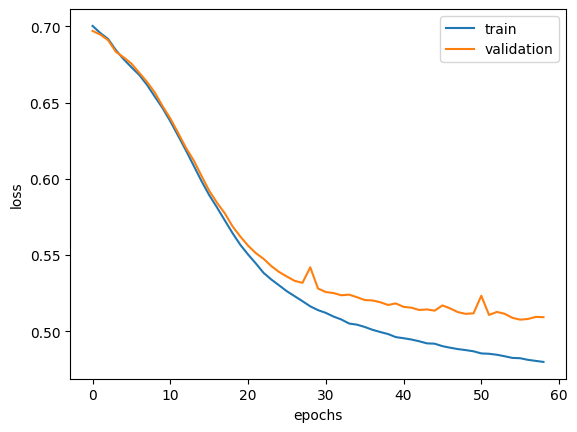

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

## 단어 임베딩을 사용하기

### 임베딩

In [ ]:
# 순환신경망
model = keras.Sequential()
# 임베딩 - 단어 개수, 임베딩 벡터 크기, 시퀀스 길이
model.add(keras.layers.Embedding(300, 16, input_length = 100))
model.add(keras.layers.SimpleRNN(8, activation='tanh'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
300 * 16

4800

In [ ]:
(16 * 8) + (8 * 8) + 8

200

In [ ]:
# 모델 요약
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           4800      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5009 (19.57 KB)
Trainable params: 5009 (19.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 옵티마이저 생성
rmsprop = keras.optimizers.RMSprop(learning_rate = 0.0001)
# 모델 설정
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = 'accuracy')
# 콜백 설정
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_rnn_model.keras',
                                                save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights=True)
# 모델 훈련
history = model.fit(X_train_sub_seq, y_train_sub, epochs=100, batch_size=64,
                     validation_data=(X_train_val_seq, y_train_val),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6893 - accuracy: 0.5351 - val_loss: 0.6706 - val_accuracy: 0.5872
Epoch 2/100
  7/313 [..............................] - ETA: 5s - loss: 0.6619 - accuracy: 0.6116

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 6s 21ms/step - loss: 0.6399 - accuracy: 0.6467 - val_loss: 0.6234 - val_accuracy: 0.6664
Epoch 3/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6051 - accuracy: 0.6941 - val_loss: 0.6003 - val_accuracy: 0.6948
Epoch 4/100
313/313 [==============================] - 6s 21ms/step - loss: 0.5831 - accuracy: 0.7172 - val_loss: 0.5888 - val_accuracy: 0.7026
Epoch 5/100
313/313 [==============================] - 6s 21ms/step - loss: 0.5663 - accuracy: 0.7305 - val_loss: 0.5669 - val_accuracy: 0.7300
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5527 - accuracy: 0.7408 - val_loss: 0.5536 - val_accuracy: 0.7356
Epoch 7/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5410 - accuracy: 0.7475 - val_loss: 0.5422 - val_accuracy: 0.7404
Epoch 8/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5313 - accuracy: 0.7509 - val_loss: 0.5443 - val_accuracy: 0.7352
Epoc

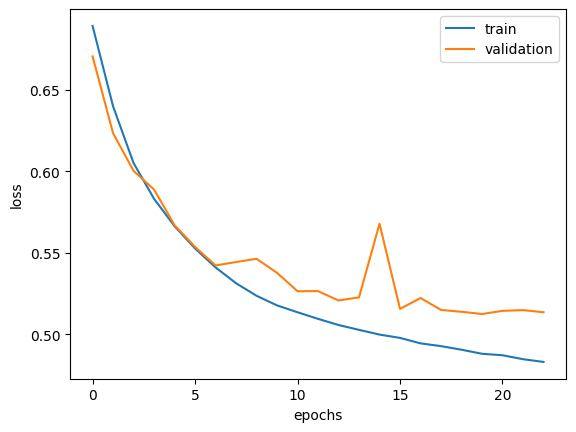

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

# LSTM 순환신경망

## 데이터 준비

In [ ]:
# 데이터 불러오기
from tensorflow.keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=300)
print(X_train.shape)
print(X_test.shape)
# 훈련/검증데이터 분할
from sklearn.model_selection import train_test_split
X_train_sub, X_train_val, y_train_sub, y_train_val = train_test_split(X_train,
                                                                      y_train,
                                                                      test_size=0.2,
                                                                      random_state=42)
print(X_train.shape)
print(X_train_sub.shape)
print(X_train_val.shape)

(25000,)
(25000,)
(25000,)
(20000,)
(5000,)


## 시퀀스 패딩

In [ ]:
# 시퀀스 패딩
# 시퀀스 = 100
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train_sub_seq = pad_sequences(X_train_sub, maxlen=100)
X_train_val_seq = pad_sequences(X_train_val, maxlen=100)

## 모델 만들기 - 기본

In [ ]:
# LSTM 모델 - 순환층 1개
model = keras.Sequential()
model.add(keras.layers.Embedding(300, 16, input_length = 100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
300 * 16

4800

In [ ]:
((16 * 8) + (8 * 8 + 8)) * 4

800

In [ ]:
# 모델 구조
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           4800      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5609 (21.91 KB)
Trainable params: 5609 (21.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 모델 설정
rmsprop = keras.optimizers.RMSprop(learning_rate = 0.0001)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = 'accuracy')
# 콜백 설정
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_lstm_model.keras',
                                                save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights=True)
# 모델 훈련
history = model.fit(X_train_sub_seq, y_train_sub, epochs=100, batch_size=64,
                     validation_data=(X_train_val_seq, y_train_val),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 12s 33ms/step - loss: 0.6929 - accuracy: 0.5230 - val_loss: 0.6924 - val_accuracy: 0.5586
Epoch 2/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6914 - accuracy: 0.5860 - val_loss: 0.6900 - val_accuracy: 0.6008
Epoch 3/100
313/313 [==============================] - 9s 30ms/step - loss: 0.6850 - accuracy: 0.6309 - val_loss: 0.6763 - val_accuracy: 0.6336
Epoch 4/100
313/313 [==============================] - 8s 27ms/step - loss: 0.6449 - accuracy: 0.6719 - val_loss: 0.6282 - val_accuracy: 0.6744
Epoch 5/100
313/313 [==============================] - 8s 27ms/step - loss: 0.6131 - accuracy: 0.6907 - val_loss: 0.6080 - val_accuracy: 0.6922
Epoch 6/100
313/313 [==============================] - 9s 28ms/step - loss: 0.5973 - accuracy: 0.7036 - val_loss: 0.5934 - val_accuracy: 0.7008
Epoch 7/100
313/313 [==============================] - 9s 30ms/step - loss: 0.5827 - accuracy: 0.7134 - val_loss: 0.5792 - val_accurac

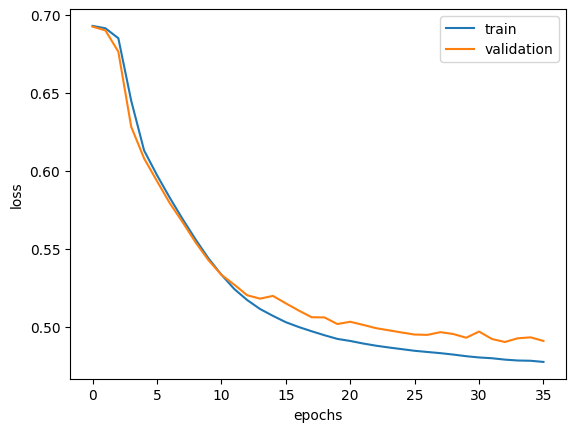

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# 검증 점수
model.evaluate(X_train_val_seq, y_train_val)

157/157 [==============================] - 1s 7ms/step - loss: 0.4903 - accuracy: 0.7596


[0.4903351962566376, 0.7595999836921692]

### 최종 평가

In [ ]:
# 테스트 데이터 전처리
X_test_seq = pad_sequences(X_test, maxlen=100)

In [ ]:
# 최종 모델 설정(훈련 전체 데이터로 최적의 에포크만큼 훈련) 후 평가해야 함
# 최종 평가
model.evaluate(X_test_seq, y_test)

782/782 [==============================] - 6s 7ms/step - loss: 0.4905 - accuracy: 0.7606


[0.49053746461868286, 0.760640025138855]

## 모델 만들기 - 드롭아웃

In [ ]:
# LSTM 모델 - 순환층 1개 & 드롭아웃
model = keras.Sequential()
model.add(keras.layers.Embedding(300, 16, input_length = 100))
model.add(keras.layers.LSTM(8, dropout = 0.3))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
((16 * 8) + (8 * 8 + 8)) * 4

800

In [ ]:
# 모델 구조
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           4800      
                                                                 
 lstm_1 (LSTM)               (None, 8)                 800       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5609 (21.91 KB)
Trainable params: 5609 (21.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 모델 설정
rmsprop = keras.optimizers.RMSprop(learning_rate = 0.0001)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])
# 콜백 설정
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best_lstm_dropout_model.keras', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights=True)
# 모델 훈련
history = model.fit(X_train_sub_seq, y_train_sub, epochs=100, batch_size=64,
                     validation_data=(X_train_val_seq, y_train_val),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 12s 33ms/step - loss: 0.6930 - accuracy: 0.5091 - val_loss: 0.6928 - val_accuracy: 0.5080
Epoch 2/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6925 - accuracy: 0.5283 - val_loss: 0.6923 - val_accuracy: 0.5338
Epoch 3/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6918 - accuracy: 0.5627 - val_loss: 0.6914 - val_accuracy: 0.5590
Epoch 4/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6905 - accuracy: 0.5709 - val_loss: 0.6896 - val_accuracy: 0.5934
Epoch 5/100
313/313 [==============================] - 10s 32ms/step - loss: 0.6877 - accuracy: 0.6015 - val_loss: 0.6853 - val_accuracy: 0.6194
Epoch 6/100
313/313 [==============================] - 9s 30ms/step - loss: 0.6790 - accuracy: 0.6337 - val_loss: 0.6676 - val_accuracy: 0.6622
Epoch 7/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6399 - accuracy: 0.6686 - val_loss: 0.6216 - val_accu

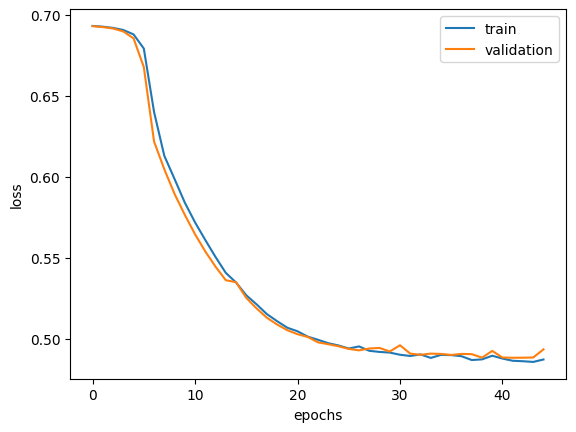

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

### 최종 평가

In [ ]:
# 테스트 데이터 전처리
X_test_seq = pad_sequences(X_test, maxlen=100)

In [ ]:
# 최종 모델 설정(훈련 전체 데이터로 최적의 에포크만큼 훈련) 후 평가해야 함
# 최종 평가
model.evaluate(X_test_seq, y_test)

782/782 [==============================] - 6s 7ms/step - loss: 0.4903 - accuracy: 0.7600


[0.490322470664978, 0.7599999904632568]

## 모델 만들기 - 순환층 2개

In [ ]:
# LSTM 모델 - 순환층 2개
model = keras.Sequential()
model.add(keras.layers.Embedding(300, 16, input_length = 100))
# 이전 순환층은 모든 은닉상태가 나와야 하므로 return_sequences = True
model.add(keras.layers.LSTM(8, dropout = 0.3, return_sequences = True))
# 마지막 순환층은 마지막 은닉상태만 나와야 하므로 return_sequences = False(기본값)
model.add(keras.layers.LSTM(8, dropout = 0.3))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [ ]:
((16 * 8) + (8 * 8 + 8)) * 4

800

In [ ]:
((8 * 8) + (8 * 8 + 8)) * 4

544

In [ ]:
# 모델 설정
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])
# 콜백 설정
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_lstm_2_model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)
# 모델 훈련
history = model.fit(X_train_sub_seq, y_train_sub, epochs=100, batch_size=64,
                     validation_data=(X_train_val_seq, y_train_val),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 22s 58ms/step - loss: 0.6931 - accuracy: 0.5096 - val_loss: 0.6930 - val_accuracy: 0.4984
Epoch 2/100
313/313 [==============================] - 19s 60ms/step - loss: 0.6927 - accuracy: 0.5293 - val_loss: 0.6926 - val_accuracy: 0.4970
Epoch 3/100
313/313 [==============================] - 17s 54ms/step - loss: 0.6919 - accuracy: 0.5464 - val_loss: 0.6915 - val_accuracy: 0.5126
Epoch 4/100
313/313 [==============================] - 17s 54ms/step - loss: 0.6892 - accuracy: 0.5649 - val_loss: 0.6866 - val_accuracy: 0.6066
Epoch 5/100
313/313 [==============================] - 18s 57ms/step - loss: 0.6776 - accuracy: 0.6279 - val_loss: 0.6633 - val_accuracy: 0.6610
Epoch 6/100
313/313 [==============================] - 18s 59ms/step - loss: 0.6342 - accuracy: 0.6730 - val_loss: 0.6063 - val_accuracy: 0.6884
Epoch 7/100
313/313 [==============================] - 17s 56ms/step - loss: 0.5964 - accuracy: 0.6929 - val_loss: 0.5823 - val_ac

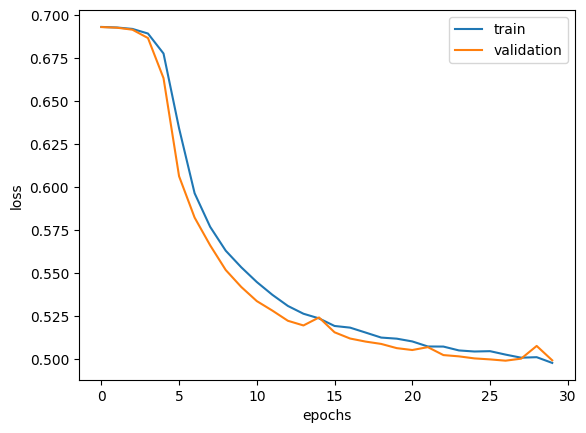

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

### 최종 평가

In [ ]:
# 테스트 데이터 전처리
X_test_seq = pad_sequences(X_test, maxlen=100)

In [ ]:
# 최종 모델 설정(훈련 전체 데이터로 최적의 에포크만큼 훈련) 후 평가해야 함
# 최종 평가
model.evaluate(X_test_seq, y_test)

782/782 [==============================] - 10s 12ms/step - loss: 0.5014 - accuracy: 0.7540


[0.5014320015907288, 0.754040002822876]

# LSTM - 로이터 뉴스 카테고리 분류

## 데이터 준비

In [ ]:
# 데이터 불러오기 - 자주 사용하는 단어 1000개, 테스트 데이터 20%
(X_train, y_train), (X_test, y_test) = keras.datasets.reuters.load_data(num_words=1000, test_split=0.2)
(X_train, y_train), (X_test, y_test)

2110848/2110848 [==============================] - 0s 0us/step


((array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
         list([1, 2, 699, 2, 2, 56, 2, 2, 9, 56, 2, 2, 81, 5, 2, 57, 366, 737, 132, 20, 2, 7, 2, 49, 2, 2, 2, 2, 699, 2, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2, 2, 2, 775, 7, 48, 34, 191, 44, 35, 2, 505, 17, 12]),
         list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 2, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 2, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 2, 55, 2, 92, 617, 80, 2, 46, 905, 22

In [ ]:
# 훈련 / 테스트 데이터 크기
print(X_train.shape)
print(X_test.shape)

(8982,)
(2246,)


In [ ]:
# 1번째 뉴스
print(X_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [ ]:
# 1번째 뉴스 단어 개수
print(len(X_train[0]))

87


In [ ]:
# 2 번째 뉴스 단어 개수
print(len(X_train[1]))

56


In [ ]:
# 타깃 데이터 20개 출력
print(y_train[:20])
# 카테고리 46 개

[ 3  4  3  4  4  4  4  3  3 16  3  3  4  4 19  8 16  3  3 21]


In [ ]:
np.max(y_train)

45

In [ ]:
# 제로인덱스이므로 실제로 46개의 토픽
category = np.max(y_train) + 1
print('카테고리 개수: ', category)

카테고리 개수:  46


### 훈련 세트 준비

In [ ]:
from sklearn.model_selection import train_test_split
# 훈련 / 검증 데이터 분할
X_train_sub, X_train_val, y_train_sub, y_train_val = train_test_split(X_train,
                                                                      y_train,
                                                                      test_size=0.2,
                                                                      random_state=42)
print(X_train.shape)
print(X_train_sub.shape)
print(X_train_val.shape)

(8982,)
(7185,)
(1797,)


In [ ]:
# 각 뉴스의 단어 개수 저장
length = np.array([len(x) for x in X_train_sub])
length

array([116,  53, 102, ..., 113,  17,  80])

In [ ]:
# 평균, 중앙값
print(np.mean(length))
print(np.median(length))

145.97800974251913
95.0


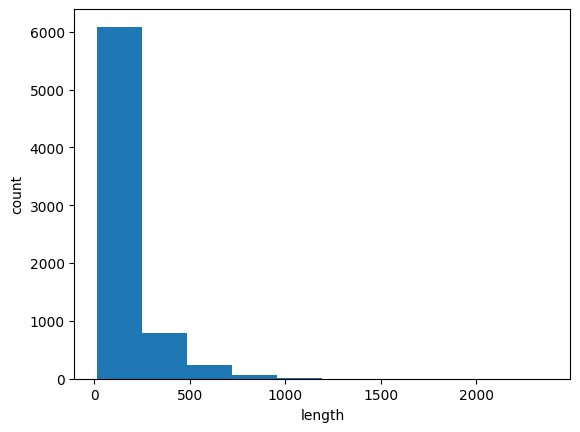

In [ ]:
plt.hist(length)
plt.xlabel('length')
plt.ylabel('count')
plt.show()

## 시퀀스 패딩

In [ ]:
# 시퀀스 패딩
# 시퀀스 = 100
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 훈련 서브 데이터
X_train_sub_seq = pad_sequences(X_train_sub, maxlen=100)
# 검증 데이터
X_train_val_seq = pad_sequences(X_train_val, maxlen=100)
# 테스트 데이터
X_test_seq = pad_sequences(X_test, maxlen=100)

In [ ]:
# 시퀀스 패딩된 훈련 서브데이터 크기 확인
print(X_train_sub_seq.shape)
# 1번째 시퀀스 패딩 데이터
print(X_train_sub_seq[0])
# 1번째 뉴스 - 끝에서 10개 단어
print(X_train_sub[0][-10:])

(7185, 100)
[ 37  38   2 229   6   2 136   4 198   2 364   2   4  37  38 309 213   8
   4 213   8   4  88  33  30   2  31   2  22   4 740 291   2   2   2   9
   4   2  33   2  37  38 162   6   2  28 577  87   7   4   2  76   2  40
 414   2 445  18  82   5  37  38   2 229 136  10 375 198   2   2 292 726
  83  48  16   8 783   5   4 738   2 348  42   2  13 988  22 973  33  30
 582   7   4 757 481   4 213   8  17  12]
[582, 7, 4, 757, 481, 4, 213, 8, 17, 12]


In [ ]:
# 2 번째 시퀀스 패딩 데이터
print(X_train_sub_seq[1])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   1   4 248 409   2   4  37
  38 106 221  76   6   2  19  44  35  15   5   2 947 755  10 531 176   8
 368   8 248 459  62 238  28  59  12 158  20 185   4 531 792  25   2   9
   2 373   5 282   6   4 495 298  17  12]


## LSTM 신경망 만들기

In [ ]:
X_train_sub_seq.shape

(7185, 100)

In [ ]:
# 모델 생성
model = keras.Sequential()
# 임베딩 - 단어 개수, 벡터 크기, 시퀀스 길이
model.add(keras.layers.Embedding(1000, 100, input_length = 100))
model.add(keras.layers.LSTM(100, activation='tanh'))
model.add(keras.layers.Dense(46, activation = 'softmax'))

In [ ]:
1000 * 100
# 십만개

100000

In [ ]:
((100 * 100) + (100 * 100 + 100)) * 4

80400

In [ ]:
100 * 46 + 46

4646

In [ ]:
# 모델 구조
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 100)          100000    
                                                                 
 lstm_4 (LSTM)               (None, 100)               80400     
                                                                 
 dense_5 (Dense)             (None, 46)                4646      
                                                                 
Total params: 185046 (722.84 KB)
Trainable params: 185046 (722.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 모델 그림

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


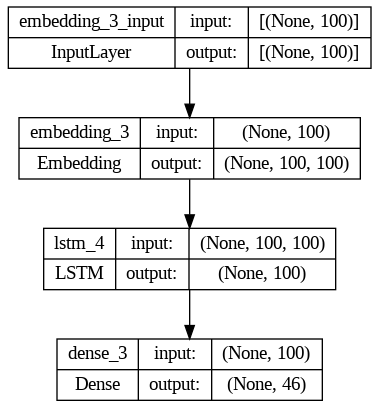

## 모델 훈련

In [ ]:
# 모델의 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 콜백 체크포인트, 최적 모델 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_lstm_model.keras', save_best_only=True)
# 조기 종료, 3 번 이상 나아지지 않으면 종료, 최적 모델 파라미터 복원
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
# 모델 훈련 및 히스토리 저장
history = model.fit(X_train_sub_seq, y_train_sub, epochs=100, batch_size=100,
                     validation_data=(X_train_val_seq, y_train_val),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
72/72 [==============================] - 20s 249ms/step - loss: 2.6377 - accuracy: 0.3360 - val_loss: 2.3851 - val_accuracy: 0.3534
Epoch 2/100
72/72 [==============================] - 16s 228ms/step - loss: 2.1531 - accuracy: 0.4633 - val_loss: 2.0827 - val_accuracy: 0.4986
Epoch 3/100
72/72 [==============================] - 16s 228ms/step - loss: 2.0266 - accuracy: 0.5029 - val_loss: 2.0307 - val_accuracy: 0.5047
Epoch 4/100
72/72 [==============================] - 16s 228ms/step - loss: 1.9658 - accuracy: 0.5194 - val_loss: 1.9570 - val_accuracy: 0.5125
Epoch 5/100
72/72 [==============================] - 16s 228ms/step - loss: 1.9759 - accuracy: 0.5165 - val_loss: 2.0587 - val_accuracy: 0.4936
Epoch 6/100
72/72 [==============================] - 16s 227ms/step - loss: 1.8619 - accuracy: 0.5319 - val_loss: 1.7546 - val_accuracy: 0.5531
Epoch 7/100
72/72 [==============================] - 16s 228ms/step - loss: 1.7392 - accuracy: 0.5585 - val_loss: 1.6745 - val_accuracy:

In [ ]:
print(early_stopping_cb.stopped_epoch)

26


In [ ]:
print(history.history)

{'loss': [2.637653112411499, 2.153141498565674, 2.0265517234802246, 1.965772032737732, 1.975882887840271, 1.8618662357330322, 1.7392475605010986, 1.6229934692382812, 1.5592422485351562, 1.483620285987854, 1.4257978200912476, 1.3868086338043213, 1.3065153360366821, 1.2445225715637207, 1.1834059953689575, 1.1226189136505127, 1.0799813270568848, 1.037683129310608, 0.9804312586784363, 0.9538289904594421, 0.9238978624343872, 0.8825847506523132, 0.8419621586799622, 0.8101891279220581, 0.7748607993125916, 0.7440600395202637, 0.7170976400375366], 'accuracy': [0.3359777331352234, 0.4633263647556305, 0.5028531551361084, 0.5194154381752014, 0.5164926648139954, 0.5319415330886841, 0.5585247278213501, 0.5894224047660828, 0.6059846878051758, 0.630480170249939, 0.6437021493911743, 0.6501044034957886, 0.6718162894248962, 0.6894919872283936, 0.7060542702674866, 0.719554603099823, 0.731384813785553, 0.7397355437278748, 0.7542101740837097, 0.7562978267669678, 0.7667362689971924, 0.7778705358505249, 0.786

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
history_df = pd.DataFrame(history.history)
history_df[history_df['val_loss'] == min(history_df['val_loss'])]

,loss,accuracy,val_loss,val_accuracy
23,0.810189,0.795546,1.168018,0.728993


## 검증손실

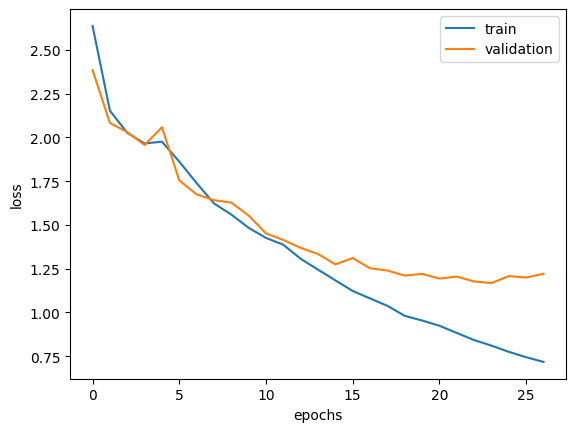

In [ ]:
# 손실곡선 - 손실값
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# 검증 데이터로 평가
model.evaluate(X_train_val_seq, y_train_val)

57/57 [==============================] - 1s 18ms/step - loss: 1.1680 - accuracy: 0.7290


[1.1680184602737427, 0.728992760181427]

## 최종 모델

In [ ]:
# 동일한 모델 생성
model = keras.Sequential()
model.add(keras.layers.Embedding(1000, 100, input_length = 100))
model.add(keras.layers.LSTM(100, activation='tanh'))
model.add(keras.layers.Dense(46, activation = 'softmax'))
# 모델 설정
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# 최적의 에포크
patience = 3
opt_epoch = early_stopping_cb.stopped_epoch - patience + 1
# 테스트 데이터 전처리 (훈련 데이터와 동일하게 적용)
X_train_seq = pad_sequences(X_train, maxlen = 100)
# 모델 훈련
model.fit(X_train_seq, y_train, epochs = opt_epoch, batch_size=100)

Epoch 1/24
90/90 [==============================] - 21s 210ms/step - loss: 2.5617 - accuracy: 0.3594
Epoch 2/24
90/90 [==============================] - 19s 209ms/step - loss: 2.0710 - accuracy: 0.4791
Epoch 3/24
90/90 [==============================] - 19s 208ms/step - loss: 1.8380 - accuracy: 0.5223
Epoch 4/24
90/90 [==============================] - 19s 209ms/step - loss: 1.7454 - accuracy: 0.5460
Epoch 5/24
90/90 [==============================] - 19s 211ms/step - loss: 1.8050 - accuracy: 0.5414
Epoch 6/24
90/90 [==============================] - 19s 208ms/step - loss: 1.6386 - accuracy: 0.5799
Epoch 7/24
90/90 [==============================] - 19s 208ms/step - loss: 1.5992 - accuracy: 0.5865
Epoch 8/24
90/90 [==============================] - 19s 208ms/step - loss: 1.5268 - accuracy: 0.6039
Epoch 9/24
90/90 [==============================] - 19s 207ms/step - loss: 1.4526 - accuracy: 0.6279
Epoch 10/24
90/90 [==============================] - 19s 210ms/step - loss: 1.3502 - accura

In [ ]:
# 예측 확률
y_test_pred = model.predict(X_test_seq)
print(y_test_pred)
# 예측 분류값
y_test_bin = np.argmax(y_test_pred, axis = 1)
print(y_test_bin)
# 실제 분류값
print(y_test)

71/71 [==============================] - 2s 18ms/step
[[3.4576014e-04 6.5231379e-03 1.3071512e-05 ... 8.0073180e-05
  7.8055500e-06 2.3752167e-05]
 [2.2865019e-03 2.7748668e-01 1.1725968e-03 ... 6.1781488e-05
  4.7295321e-06 4.0277464e-05]
 [3.7840048e-03 7.3472872e-02 7.8590564e-02 ... 7.5011270e-04
  1.7198604e-03 2.0300925e-03]
 ...
 [3.7052254e-05 2.1794366e-03 4.8271841e-06 ... 1.1985008e-05
  7.9581980e-07 1.7861978e-06]
 [4.3454702e-04 3.7251231e-03 1.4127879e-05 ... 4.2440646e-05
  1.1405111e-05 5.7428380e-05]
 [3.1271847e-03 4.3787575e-01 3.2287139e-02 ... 1.9980826e-04
  1.0030590e-04 8.4927255e-05]]
[ 3 10 28 ...  3  3  1]
[ 3 10  1 ...  3  3 24]


In [ ]:
# 실제 분류값과 예측 분류값을 비교하여 점수 산출
np.mean(y_test == y_test_bin)

0.7092609082813891

In [ ]:
# 테스트 점수
model.evaluate(X_test_seq, y_test)

71/71 [==============================] - 2s 19ms/step - loss: 1.1923 - accuracy: 0.7093


[1.1923009157180786, 0.709260880947113]